In [157]:
import pandas as pd
import matplotlib.pyplot as plt

dems = pd.read_csv('pilot/demographics.tsv', sep='\t')
dems = dems[dems['annotator_id']!= 'test']

anns = pd.read_csv('pilot/annotations.tsv', sep='\t')
anns = anns[anns['annotator_ir']!= 'test']

len(dems), len(anns)

(108, 2815)

## Demographics

In [158]:
dems = dems.sort_values('annotator_id')
dems['duplicated'] = dems.duplicated(subset=['annotator_id'])

In [159]:
dems = dems[dems['duplicated']==False]

In [160]:
dems.gender.value_counts()

gender
Female        54
Male          34
Non-binary     1
Name: count, dtype: int64

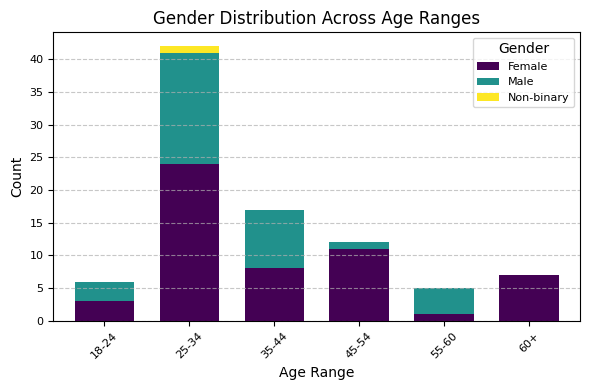

In [161]:
age_gender_dist = dems.groupby("age")["gender"].value_counts().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(6, 4))
age_gender_dist.plot(kind="bar", stacked=True, ax=ax, width=0.7, colormap="viridis")

ax.set_xlabel("Age Range")
ax.set_ylabel("Count")
ax.set_title("Gender Distribution Across Age Ranges")
ax.legend(title="Gender", loc="upper right", fontsize=8)
ax.tick_params(axis="x", rotation=45, labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout() 
plt.show()

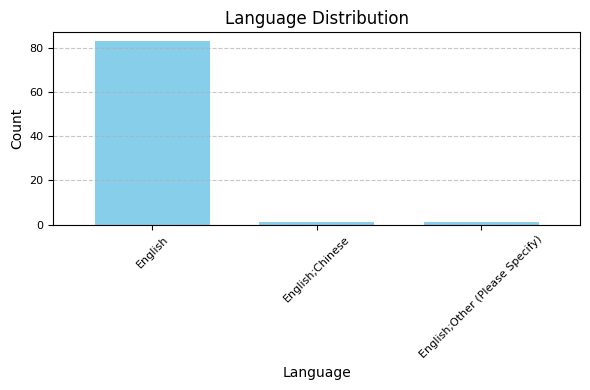

In [162]:
language_counts = dems["language"].value_counts()

fig, ax = plt.subplots(figsize=(6, 4))  # Smaller figure size
language_counts.plot(kind="bar", ax=ax, color="skyblue", width=0.7)

ax.set_xlabel("Language")
ax.set_ylabel("Count")
ax.set_title("Language Distribution")
ax.tick_params(axis="x", rotation=45, labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

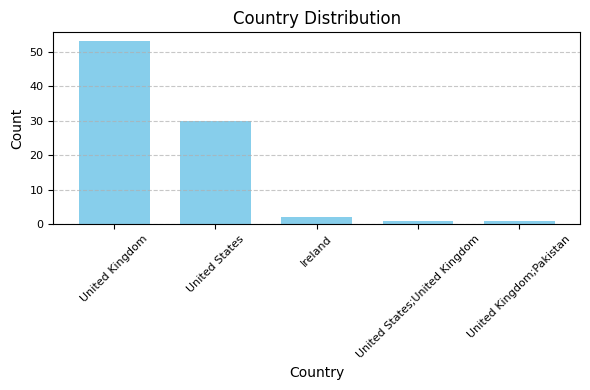

In [174]:
language_counts = dems["nationality"].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(6, 4))  
language_counts.plot(kind="bar", ax=ax, color="skyblue", width=0.7)

ax.set_xlabel("Country")
ax.set_ylabel("Count")
ax.set_title("Country Distribution")
ax.tick_params(axis="x", rotation=45, labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout() 
plt.show()

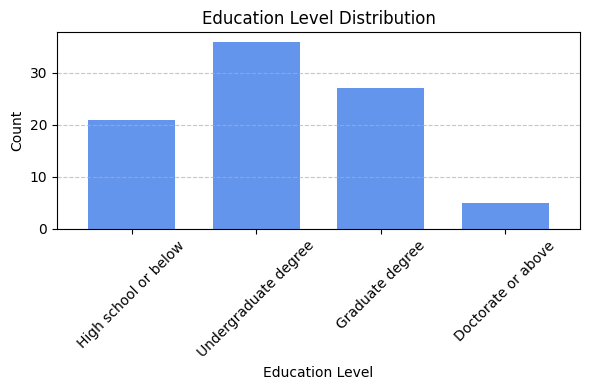

In [164]:
from pandas.api.types import CategoricalDtype

custom_order = ['High school or below', 'Undergraduate degree', 'Graduate degree', 'Doctorate or above']

edu_type = CategoricalDtype(categories=custom_order, ordered=True)
dems["education"] = dems["education"].astype(edu_type)

edu_counts = dems["education"].value_counts().reindex(custom_order, fill_value=0)

fig, ax = plt.subplots(figsize=(6, 4))
edu_counts.plot(kind="bar", ax=ax, color="cornflowerblue", width=0.7)

ax.set_xlabel("Education Level")
ax.set_ylabel("Count")
ax.set_title("Education Level Distribution")
ax.tick_params(axis="x", rotation=45, labelsize=10)
ax.tick_params(axis="y", labelsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [165]:
dems.reserved.unique()

array(['Strongly agree', 'Disagree', 'Agree', 'Strongly disagree',
       'Neutral'], dtype=object)

## Big 5 Analysis


Extraversion: reserved, outgoing
Agreeableness: trusting, hates_others
Conscientiousness: lazy, detailed
Neuroticism: relaxed, nervous
Openness: not_artistic, imaginative


In [175]:
df = dems.copy()

big_5 = ['reserved', 'trusting', 'lazy', 'relaxed', 'not_artistic', 'outgoing', 'hates_others', 'detailed', 'nervous', 'imaginative']
'''
Extraversion: reserved, outgoing
Agreeableness: trusting, hates_others
Conscientiousness: lazy, detailed
Neuroticism: relaxed, nervous
Openness: not_artistic, imaginative
'''
response_map = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly agree": 5
}

for col in big_5:
    df[col] = df[col].map(response_map)


reverse_scored = ['reserved', 'hates_others', 'lazy', 'relaxed', 'not_artistic']

def reverse_score(row, column):
    return 6 - row[column]  

for column in reverse_scored:
    df[column] = df.apply(lambda row: reverse_score(row, column), axis=1)

df['Openness'] = df['imaginative'] + df['not_artistic']
df['Conscientiousness'] = df['lazy'] + df['detailed']
df['Extraversion'] = df['reserved'] + df['outgoing']
df['Agreeableness'] = df['trusting'] + df['hates_others']
df['Neuroticism'] = df['relaxed'] + df['nervous']

personality_columns = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']

df[['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']].describe()


,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
count,89.000000,88.000000,89.000000,89.000000,88.000000
mean,7.157303,7.488636,5.573034,6.797753,5.931818
std,1.413401,1.493236,2.005037,1.673183,1.880300
min,4.000000,3.000000,2.000000,2.000000,2.000000
25%,6.000000,6.000000,4.000000,6.000000,4.750000
50%,7.000000,8.000000,6.000000,7.000000,6.000000
75%,8.000000,8.000000,7.000000,8.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [176]:
df.groupby('gender')[['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']].describe()


Openness                                                \
              count      mean       std  min  25%  50%  75%   max   
gender                                                              
Female         54.0  6.962963  1.453207  4.0  6.0  7.0  8.0  10.0   
Male           34.0  7.411765  1.305412  5.0  7.0  7.0  8.0  10.0   
Non-binary      1.0  9.000000       NaN  9.0  9.0  9.0  9.0   9.0   

           Conscientiousness            ... Agreeableness       Neuroticism  \
                       count      mean  ...           75%   max       count   
gender                                  ...                                   
Female                  54.0  7.518519  ...           8.0  10.0        54.0   
Male                    33.0  7.515152  ...           8.0  10.0        33.0   
Non-binary               1.0  5.000000  ...           8.0   8.0         1.0   

                                                           
                mean       std  min  25%  50%   75%   max  
gender                                                     
Female      5.981481  1.878284  2.0  5.0  6.0  7.75  10.0  
Male        5.848485  1.938447  3.0  4.0  6.0  8.00   9.0  
Non-binary  6.000000       NaN  6.0  6.0  6.0  6.00   6.0  

[3 rows x 40 columns]

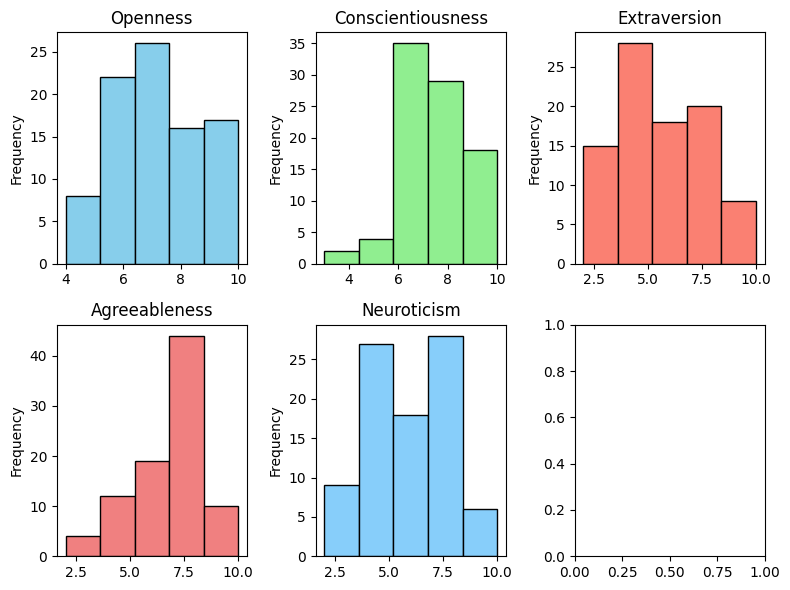

In [168]:
fig, axes = plt.subplots(2, 3, figsize=(8, 6))

df['Openness'].plot(kind='hist', ax=axes[0, 0], bins=5, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Openness')

df['Conscientiousness'].plot(kind='hist', ax=axes[0, 1], bins=5, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Conscientiousness')

df['Extraversion'].plot(kind='hist', ax=axes[0, 2], bins=5, color='salmon', edgecolor='black')
axes[0, 2].set_title('Extraversion')

df['Agreeableness'].plot(kind='hist', ax=axes[1, 0], bins=5, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Agreeableness')

df['Neuroticism'].plot(kind='hist', ax=axes[1, 1], bins=5, color='lightskyblue', edgecolor='black')
axes[1, 1].set_title('Neuroticism')

plt.tight_layout()
plt.show()

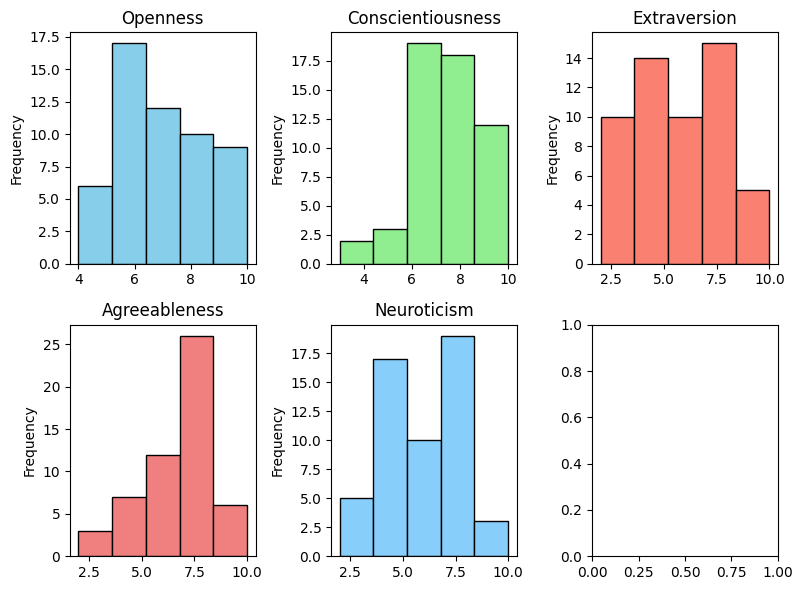

In [169]:
women = df[df['gender']=='Female']
fig, axes = plt.subplots(2, 3, figsize=(8, 6))

women['Openness'].plot(kind='hist', ax=axes[0, 0], bins=5, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Openness')

women['Conscientiousness'].plot(kind='hist', ax=axes[0, 1], bins=5, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Conscientiousness')

women['Extraversion'].plot(kind='hist', ax=axes[0, 2], bins=5, color='salmon', edgecolor='black')
axes[0, 2].set_title('Extraversion')

women['Agreeableness'].plot(kind='hist', ax=axes[1, 0], bins=5, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Agreeableness')

women['Neuroticism'].plot(kind='hist', ax=axes[1, 1], bins=5, color='lightskyblue', edgecolor='black')
axes[1, 1].set_title('Neuroticism')

plt.tight_layout()
plt.show()

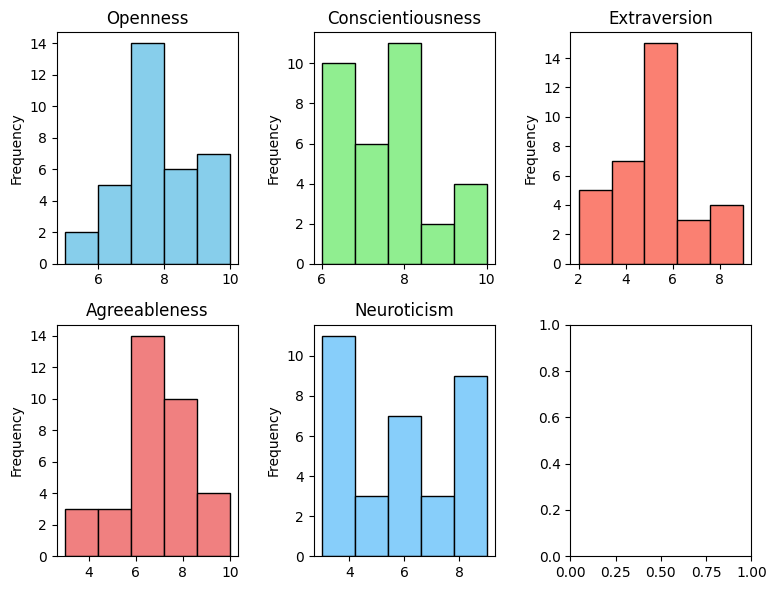

In [170]:
men = df[df['gender']=='Male']
fig, axes = plt.subplots(2, 3, figsize=(8, 6))

men['Openness'].plot(kind='hist', ax=axes[0, 0], bins=5, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Openness')

men['Conscientiousness'].plot(kind='hist', ax=axes[0, 1], bins=5, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Conscientiousness')

men['Extraversion'].plot(kind='hist', ax=axes[0, 2], bins=5, color='salmon', edgecolor='black')
axes[0, 2].set_title('Extraversion')

men['Agreeableness'].plot(kind='hist', ax=axes[1, 0], bins=5, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Agreeableness')

men['Neuroticism'].plot(kind='hist', ax=axes[1, 1], bins=5, color='lightskyblue', edgecolor='black')
axes[1, 1].set_title('Neuroticism')

plt.tight_layout()
plt.show()

# Dimensions

- how many for each category?
- how much overlap?
- which ones co-occur?



In [171]:
anns.columns

Index(['annotator_ir', 'session_id', 'example_id', 'knowledge', 'power',
       'status', 'trust', 'support', 'similarity', 'identity', 'fun',
       'conflict', 'other', 'other_text', 'none'],
      dtype='object')

In [172]:
dimensions = ['knowledge', 'power',
       'status', 'trust', 'support', 'similarity', 'identity', 'fun',
       'conflict', 'other', 'none']

for dimension in dimensions:
    print(dimension, anns[dimension].value_counts())

knowledge knowledge
False    2039
True      776
Name: count, dtype: int64
power power
False    2537
True      278
Name: count, dtype: int64
status status
False    2471
True      344
Name: count, dtype: int64
trust trust
False    2550
True      265
Name: count, dtype: int64
support support
False    2140
True      675
Name: count, dtype: int64
similarity similarity
False    2390
True      425
Name: count, dtype: int64
identity identity
False    2478
True      337
Name: count, dtype: int64
fun fun
False    2574
True      241
Name: count, dtype: int64
conflict conflict
False    2043
True      772
Name: count, dtype: int64
other other
False    2806
True        9
Name: count, dtype: int64
none none
False    2613
True      202
Name: count, dtype: int64


Number of examples with more than one label: 1093


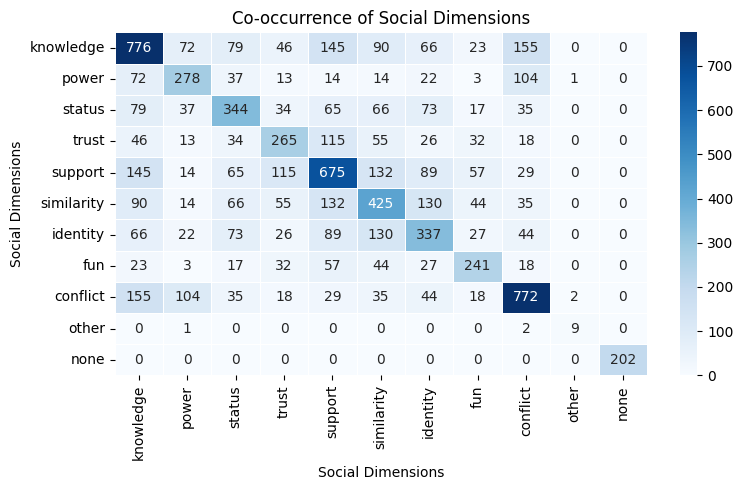

In [185]:
import seaborn as sns

anns_binary = anns[['knowledge', 'power',
       'status', 'trust', 'support', 'similarity', 'identity', 'fun',
       'conflict', 'other', 'none']].astype(int)

co_occurrence_matrix = anns_binary.T.dot(anns_binary)
anns_binary['num_true_labels'] = anns_binary[dimensions].sum(axis=1)

multi_label_count = (anns_binary['num_true_labels'] > 1).sum()

print(f"Number of examples with more than one label: {multi_label_count}")
plt.figure(figsize=(8, 5)) 
sns.heatmap(co_occurrence_matrix, annot=True, cmap='Blues', fmt="d", linewidths=0.5)

plt.title('Co-occurrence of Social Dimensions')
plt.xlabel('Social Dimensions')
plt.ylabel('Social Dimensions')
plt.tight_layout()
plt.show()


### Duplicates

In [ ]:
example_counts = anns['example_id'].value_counts()
duplicates = example_counts[example_counts > 1]
duplicate_rows = anns[anns['example_id'].isin(duplicates.index)]
print(duplicate_rows)

                  annotator_ir                session_id  example_id  \
12    62e2a39f43edf949ff427012  67ebf1399f7513d29b347a53        3048   
14    62e2a39f43edf949ff427012  67ebf1399f7513d29b347a53        3687   
16    62e2a39f43edf949ff427012  67ebf1399f7513d29b347a53        6541   
17    62e2a39f43edf949ff427012  67ebf1399f7513d29b347a53        2102   
18    62e2a39f43edf949ff427012  67ebf1399f7513d29b347a53        5921   
...                        ...                       ...         ...   
2803  66bc59b005ccfffd6775fe9f  67ed72deafa2754687e49c6d         314   
2806  66bc59b005ccfffd6775fe9f  67ed72deafa2754687e49c6d        4732   
2812  66bc59b005ccfffd6775fe9f  67ed72deafa2754687e49c6d        2677   
2814  66bc59b005ccfffd6775fe9f  67ed72deafa2754687e49c6d        7724   
2823  66bc59b005ccfffd6775fe9f  67ed72deafa2754687e49c6d        2446   

      knowledge  power  status  trust  support  similarity  identity    fun  \
12        False  False   False  False    False       Fal

In [ ]:
import numpy as np

example_counts = anns['example_id'].value_counts()
duplicates = example_counts[example_counts > 1].index

duplicate_rows = anns[anns['example_id'].isin(duplicates)]

annotation_columns = [col for col in anns.columns if col in dimensions]

binary_anns = duplicate_rows.copy()
binary_anns[annotation_columns] = binary_anns[annotation_columns].astype(int)

def check_true_label_agreement(group):
    summed = group[annotation_columns].sum()
    true_match_count = (summed > 0).sum() 
    fully_agreed_true_count = (summed == len(group)).sum() 
    if true_match_count == 0:
        return "No True Labels"
    elif true_match_count == fully_agreed_true_count:
        return "Full Agreement"
    elif fully_agreed_true_count > 0:
        return "Partial Agreement"
    else:
        return "No Agreement"

agreement_results = duplicate_rows.groupby("example_id").apply(check_true_label_agreement).reset_index()
agreement_results.columns = ["example_id", "true_label_agreement"]

duplicate_rows = duplicate_rows.merge(agreement_results, on="example_id", how="left")

len(duplicate_rows)



/var/folders/j5/d7yf57zj04d8wxhwp77l81dr0000gn/T/ipykernel_18574/1517073229.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  agreement_results = duplicate_rows.groupby("example_id").apply(check_true_label_agreement).reset_index()


977

In [ ]:
duplicate_rows['true_label_agreement'].value_counts()

true_label_agreement
No Agreement         555
Partial Agreement    295
Full Agreement       127
Name: count, dtype: int64

In [ ]:
# Step 3: Count the number of True labels per example
anns_binary['num_true_labels'] = anns_binary[annotation_columns].sum(axis=1)

multi_label_count = (anns_binary['num_true_labels'] > 1).sum()
print(multi_label_count, len(anns_binary))

1093 2815


Total 'No Agreement' examples: 555
Examples with only one True label: 375 (67.57%)
Examples with multiple True labels: 180 (32.43%)


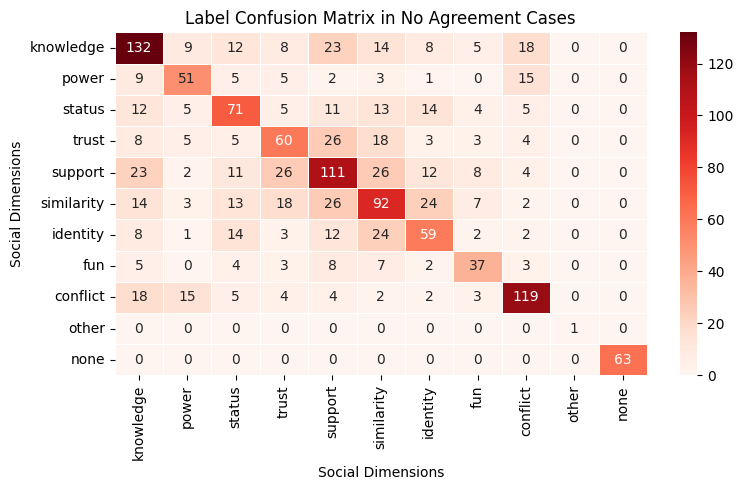

In [ ]:
no_agreement_examples = duplicate_rows[duplicate_rows['true_label_agreement'] == "No Agreement"]

annotation_columns = [col for col in anns.columns if col in dimensions]
no_agreement_binary = no_agreement_examples.copy()
no_agreement_binary[annotation_columns] = no_agreement_binary[annotation_columns].astype(int)

no_agreement_binary['num_true_labels'] = no_agreement_binary[annotation_columns].sum(axis=1)

single_label_count = (no_agreement_binary['num_true_labels'] == 1).sum()
multi_label_count = (no_agreement_binary['num_true_labels'] > 1).sum()
total_no_agreement = len(no_agreement_binary)

print(f"Total 'No Agreement' examples: {total_no_agreement}")
print(f"Examples with only one True label: {single_label_count} ({(single_label_count / total_no_agreement) * 100:.2f}%)")
print(f"Examples with multiple True labels: {multi_label_count} ({(multi_label_count / total_no_agreement) * 100:.2f}%)")

confusion_matrix = no_agreement_binary[annotation_columns].T.dot(no_agreement_binary[annotation_columns])

plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix, annot=True, cmap='Reds', fmt='d', linewidths=0.5)

plt.title("Label Confusion Matrix in No Agreement Cases")
plt.xlabel("Social Dimensions")
plt.ylabel("Social Dimensions")
plt.tight_layout()
plt.show()

Total 'Partial Agreement' examples: 295
Examples with only one True label: 98 (33.22%)
Examples with multiple True labels: 197 (66.78%)


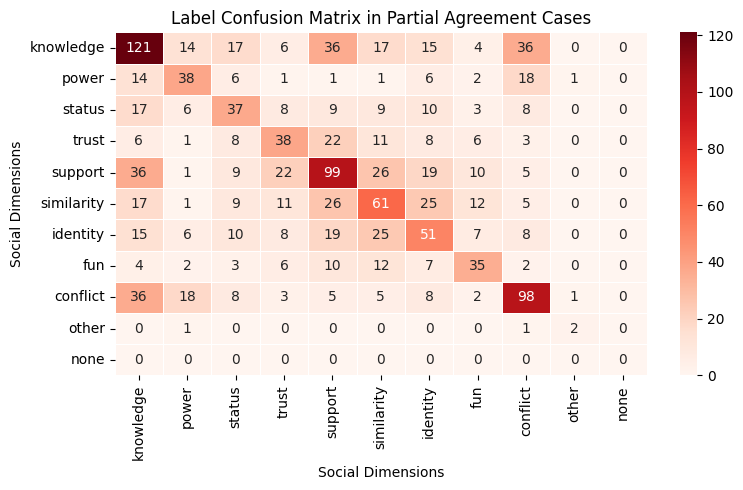

In [ ]:

partial_agreement_examples = duplicate_rows[duplicate_rows['true_label_agreement'] == "Partial Agreement"]

annotation_columns = [col for col in anns.columns if col in dimensions]
partial_agreement_binary = partial_agreement_examples.copy()
partial_agreement_binary[annotation_columns] = partial_agreement_binary[annotation_columns].astype(int)

partial_agreement_binary['num_true_labels'] = partial_agreement_binary[annotation_columns].sum(axis=1)

single_label_count = (partial_agreement_binary['num_true_labels'] == 1).sum()
multi_label_count = (partial_agreement_binary['num_true_labels'] > 1).sum()
total_no_agreement = len(partial_agreement_binary)

print(f"Total 'Partial Agreement' examples: {total_no_agreement}")
print(f"Examples with only one True label: {single_label_count} ({(single_label_count / total_no_agreement) * 100:.2f}%)")
print(f"Examples with multiple True labels: {multi_label_count} ({(multi_label_count / total_no_agreement) * 100:.2f}%)")

confusion_matrix = partial_agreement_binary[annotation_columns].T.dot(partial_agreement_binary[annotation_columns])

plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix, annot=True, cmap='Reds', fmt='d', linewidths=0.5)

plt.title("Label Confusion Matrix in Partial Agreement Cases")
plt.xlabel("Social Dimensions")
plt.ylabel("Social Dimensions")
plt.tight_layout()
plt.show()


Total 'Full Agreement' examples: 127
Examples with only one True label: 112 (88.19%)
Examples with multiple True labels: 15 (11.81%)


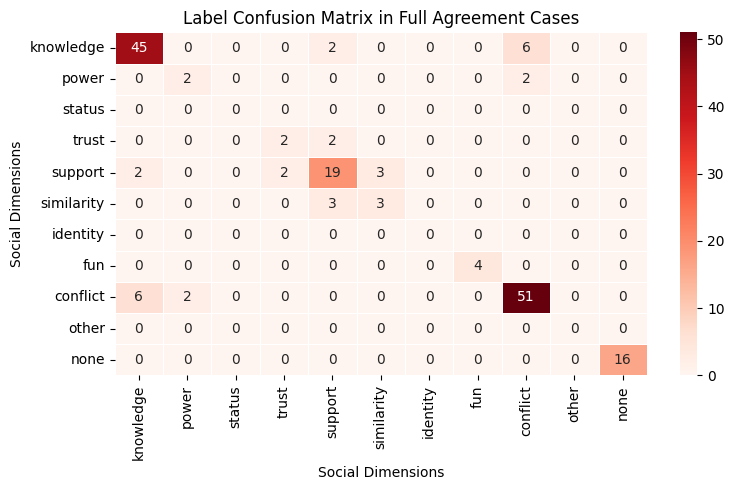

In [ ]:
full_agreement_examples = duplicate_rows[duplicate_rows['true_label_agreement'] == "Full Agreement"]

annotation_columns = [col for col in anns.columns if col in dimensions]
full_agreement_binary = full_agreement_examples.copy()
full_agreement_binary[annotation_columns] = full_agreement_binary[annotation_columns].astype(int)

full_agreement_binary['num_true_labels'] = full_agreement_binary[annotation_columns].sum(axis=1)

single_label_count = (full_agreement_binary['num_true_labels'] == 1).sum()
multi_label_count = (full_agreement_binary['num_true_labels'] > 1).sum()
total_no_agreement = len(full_agreement_binary)

print(f"Total 'Full Agreement' examples: {total_no_agreement}")
print(f"Examples with only one True label: {single_label_count} ({(single_label_count / total_no_agreement) * 100:.2f}%)")
print(f"Examples with multiple True labels: {multi_label_count} ({(multi_label_count / total_no_agreement) * 100:.2f}%)")

confusion_matrix = full_agreement_binary[annotation_columns].T.dot(full_agreement_binary[annotation_columns])

plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix, annot=True, cmap='Reds', fmt='d', linewidths=0.5)

plt.title("Label Confusion Matrix in Full Agreement Cases")
plt.xlabel("Social Dimensions")
plt.ylabel("Social Dimensions")
plt.tight_layout()
plt.show()

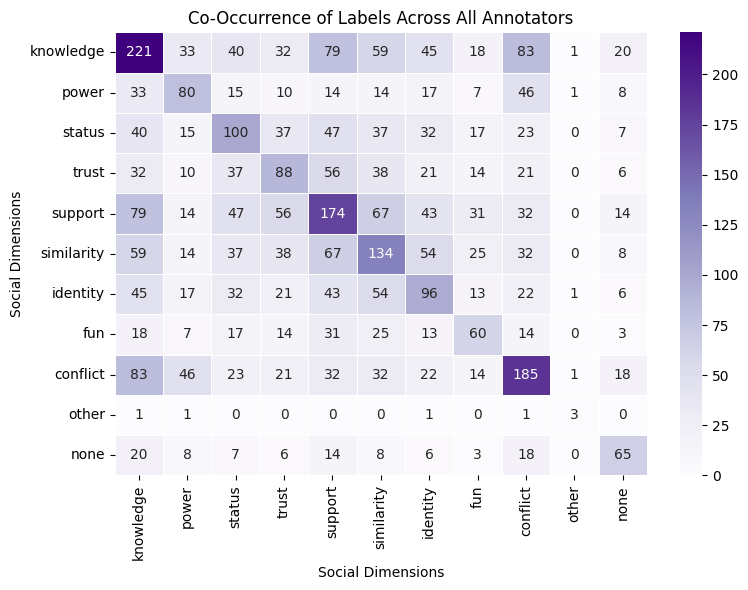

In [ ]:


combined_labels = binary_anns.groupby("example_id")[annotation_columns].max()

co_occurrence_matrix = combined_labels.T.dot(combined_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence_matrix, annot=True, cmap="Purples", fmt="d", linewidths=0.5)

plt.title("Co-Occurrence of Labels Across All Annotators")
plt.xlabel("Social Dimensions")
plt.ylabel("Social Dimensions")
plt.tight_layout()
plt.show()

In [ ]:
binary_anns

,annotator_ir,session_id,example_id,knowledge,power,status,trust,support,similarity,identity,fun,conflict,other,other_text,none
12,62e2a39f43edf949ff427012,67ebf1399f7513d29b347a53,3048,0,0,0,0,0,0,0,1,0,0,NaN,0
14,62e2a39f43edf949ff427012,67ebf1399f7513d29b347a53,3687,0,0,0,0,0,0,0,0,1,0,NaN,0
16,62e2a39f43edf949ff427012,67ebf1399f7513d29b347a53,6541,0,0,0,0,0,1,0,0,0,0,NaN,0
17,62e2a39f43edf949ff427012,67ebf1399f7513d29b347a53,2102,1,0,0,0,0,0,0,0,0,0,NaN,0
18,62e2a39f43edf949ff427012,67ebf1399f7513d29b347a53,5921,0,0,0,0,0,1,0,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,66bc59b005ccfffd6775fe9f,67ed72deafa2754687e49c6d,314,0,0,0,0,0,0,0,0,0,0,NaN,1
2806,66bc59b005ccfffd6775fe9f,67ed72deafa2754687e49c6d,4732,0,0,1,0,0,0,0,0,1,0,NaN,0
2812,66bc59b005ccfffd6775fe9f,67ed72deafa2754687e49c6d,2677,0,0,0,0,0,0,0,0,0,0,NaN,1
2814,66bc59b005ccfffd6775fe9f,67ed72deafa2754687e49c6d,7724,0,0,0,0,1,0,0,0,0,0,NaN,0


In [ ]:
anns.columns =['annotator_id', 'session_id', 'example_id', 'knowledge', 'power',
       'status', 'trust', 'support', 'similarity', 'identity', 'fun',
       'conflict', 'other', 'other_text', 'none']

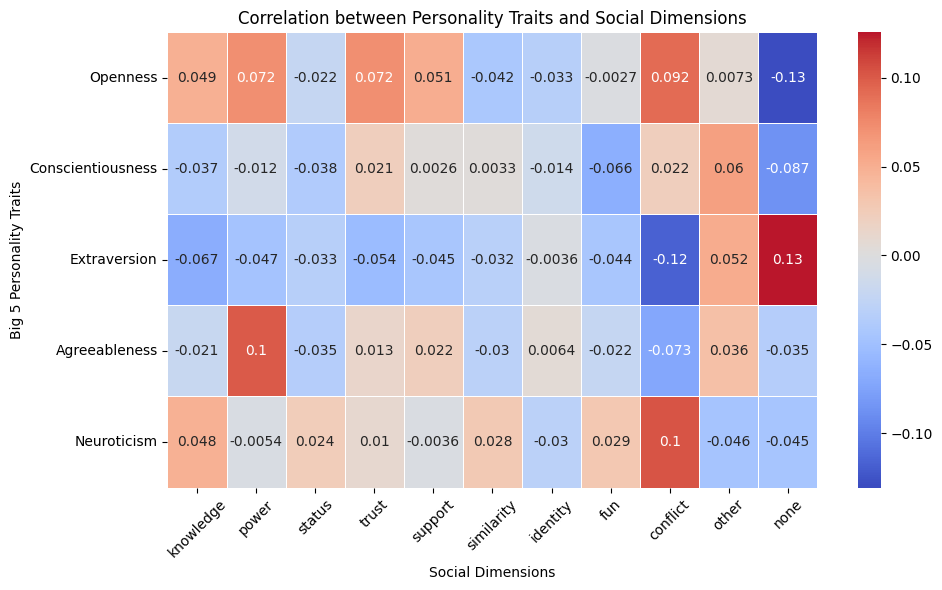

In [ ]:
merged_df = anns.merge(df, on="annotator_id", how="inner")
merged_df[annotation_columns] = merged_df[annotation_columns].astype(int)

big5_traits = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
correlation_df = merged_df[big5_traits + annotation_columns]

correlation_matrix = correlation_df.corr()

correlation_subset = correlation_matrix.loc[big5_traits, annotation_columns]

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_subset, annot=True, cmap="coolwarm", center=0, linewidths=0.5)

plt.title("Correlation between Personality Traits and Social Dimensions")
plt.xlabel("Social Dimensions")
plt.ylabel("Big 5 Personality Traits")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
correlation_df

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,knowledge,power,status,trust,support,similarity,identity,fun,conflict,other,none
0,4,10.0,6,2,8.0,1,0,1,0,0,0,0,0,0,0,0
1,4,10.0,6,2,8.0,0,0,0,0,0,0,0,0,1,0,0
2,4,10.0,6,2,8.0,0,0,0,0,0,0,0,0,1,0,0
3,4,10.0,6,2,8.0,0,0,0,0,0,0,0,1,0,0,0
4,4,10.0,6,2,8.0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302,5,7.0,3,6,8.0,0,0,1,0,0,0,0,0,0,0,0
3303,5,7.0,3,6,8.0,0,0,0,0,0,0,0,0,0,0,1
3304,5,7.0,3,6,8.0,0,0,0,0,0,0,0,0,1,0,0
3305,5,7.0,3,6,8.0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer


checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]

inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


In [ ]:
from transformers import AutoModel

model = AutoModel.from_pretrained(checkpoint)

outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

torch.Size([2, 16, 768])


In [ ]:
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)

print(outputs.logits)


tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)


In [ ]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[4.0195e-02, 9.5981e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


In [ ]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

In [ ]:
encoded_sequences = [
    [101, 7592, 999, 102],
    [101, 4658, 1012, 102],
    [101, 3835, 999, 102],
]

In [ ]:
model_inputs = torch.tensor(encoded_sequences)

In [ ]:
output = model(model_inputs)


In [ ]:
output

SequenceClassifierOutput(loss=None, logits=tensor([[-3.7235,  3.9691],
        [-4.2219,  4.5807],
        [-4.2852,  4.6166]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
tokenizer("Using a Transformer network is simple")



{'input_ids': [101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
decoded_string = tokenizer.decode([7993, 170, 11303, 1200, 2443, 1110, 3014])
print(decoded_string)

Using a transformer network is simple


In [ ]:
ann_counts = anns.drop_duplicates()['annotator_ir'].value_counts().reset_index(name="annotation_count").rename(columns={"index": "annotator_id"})

In [ ]:
ann_counts[ann_counts['annotation_count']<50]

,annotator_ir,annotation_count
38,62d999e7f5f2cde114f4169e,49
39,56abcb46f209e0000adab961,49
40,56c9e4d9b30699000bd974a5,49
41,67e6b586b2bbf7154e9a99f6,49
42,67c0c14fbddddc5e06a65ff4,48
43,66620946dcd11035bee93351,48
44,66a79366e9d1eb8c901a2b23,48
45,67cb4e757f373c872e985744,48
46,5e90a3adb3e1243bdcfaf973,47
47,665efdf173820edd2b8d4d23,47


In [ ]:
ann_counts[ann_counts['annotator_ir']=='5f913f231d26e9000aa398e4']

,annotator_ir,annotation_count


In [ ]:
from nltk import agreement
import numpy as np

original = pd.read_csv('dataids.csv')
dimensions = ['support', 'conflict',
       'trust', 'fun', 'similarity', 'identity', 'status', 
       'knowledge', 'power', 'other']

agreements = {}

for annotator in anns.annotator_ir.unique():
    annotations = anns[anns.annotator_ir == annotator].copy()
    if len(annotations) > 25:
        annotations[dimensions] = annotations[dimensions].astype(int)
        annotations = annotations.drop_duplicates(subset='example_id', keep='first').sort_values(by='example_id', ascending=False)

        ids = annotations['example_id'].unique()
        original_labels = original[original['example_id'].isin(ids)].sort_values(by='example_id', ascending=False)
        original_labels[dimensions] = original_labels[dimensions].clip(lower=0, upper=1)
        #original_labels = original_labels[dimensions].values.tolist()
        #new_labels = annotations[dimensions].values.tolist()
        an_agreement = {}
        for dimension in dimensions:
            if len(annotations[dimension].unique()) >1:
                rater1 = annotations[dimension].values.tolist()
                rater2 = original_labels[dimension].values.tolist()
                taskdata=[[0,str(i),str(rater1[i])] for i in range(0,len(rater1))] + \
                    [[1,str(i),str(rater2[i])] for i in range(0,len(rater2))]  
                ratingtask = agreement.AnnotationTask(data=taskdata)
                an_agreement[dimension] = ratingtask.kappa()
            else:
                an_agreement[dimension] = np.nan
            agreements.update({annotator: an_agreement})
            

pd.DataFrame.from_dict(agreements, orient='index').describe()




    
    

,support,conflict,trust,fun,similarity,identity,status,knowledge,power,other
count,52.000000,51.000000,49.000000,51.000000,51.000000,50.000000,48.000000,52.000000,48.000000,4.000000
mean,0.213642,0.343384,0.071224,0.250794,0.135501,0.027049,0.143952,0.167898,0.066064,0.016480
std,0.150600,0.161110,0.138842,0.223999,0.185578,0.147506,0.172699,0.146130,0.147876,0.088262
min,-0.142857,-0.056497,-0.188264,-0.073620,-0.176471,-0.199436,-0.211669,-0.086420,-0.198020,-0.075949
25%,0.109274,0.219820,-0.038062,0.034347,-0.027171,-0.085217,-0.004605,0.072666,-0.037619,-0.047919
50%,0.204174,0.352751,0.062500,0.285714,0.145299,-0.007432,0.125000,0.176194,0.040121,0.015096
75%,0.326874,0.479618,0.125714,0.390244,0.255952,0.100792,0.285714,0.280952,0.157796,0.079495
max,0.479339,0.694118,0.449438,0.789916,0.644670,0.366197,0.536862,0.489583,0.479419,0.111675


In [ ]:
# Melt it
df = pd.DataFrame.from_dict(agreements, orient='index').reset_index()
df_melted = df.melt(id_vars='index', var_name='category', value_name='agreement')
print(df_melted)

                        index category  agreement
0    62e2a39f43edf949ff427012  support   0.197248
1    5dad7f29033d57001357a2b8  support   0.429038
2    60008d84492c15142cb897b3  support   0.429658
3    67376ab89f1322d144ef3a0d  support   0.461538
4    5c330cefca23620001b262b1  support   0.168798
..                        ...      ...        ...
525  5b421b9ac2e3810001763252    other        NaN
526  66d7a4ca0fcf61aba9eb9328    other        NaN
527  672f38a8b06d76dc52673692    other        NaN
528  6727ea3905ae5d0d2cb5180c    other        NaN
529  66bc59b005ccfffd6775fe9f    other        NaN

[530 rows x 3 columns]


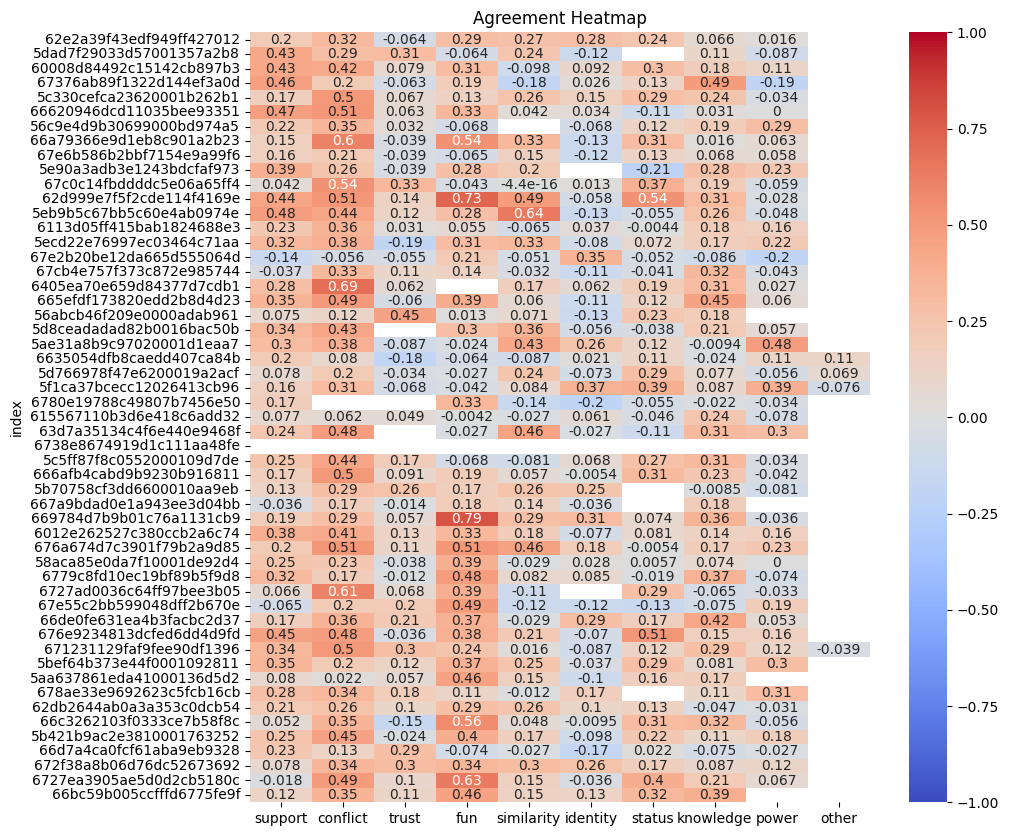

In [ ]:
import seaborn as sns
# Set index to annotator
df_indexed = df.set_index('index')

plt.figure(figsize=(10, 10))
sns.heatmap(df_indexed, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Agreement Heatmap')
plt.show()

Number of examples with more than one label: 61


/var/folders/j5/d7yf57zj04d8wxhwp77l81dr0000gn/T/ipykernel_82042/4084016085.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_romance[dimensions] = not_romance[dimensions].astype(int)


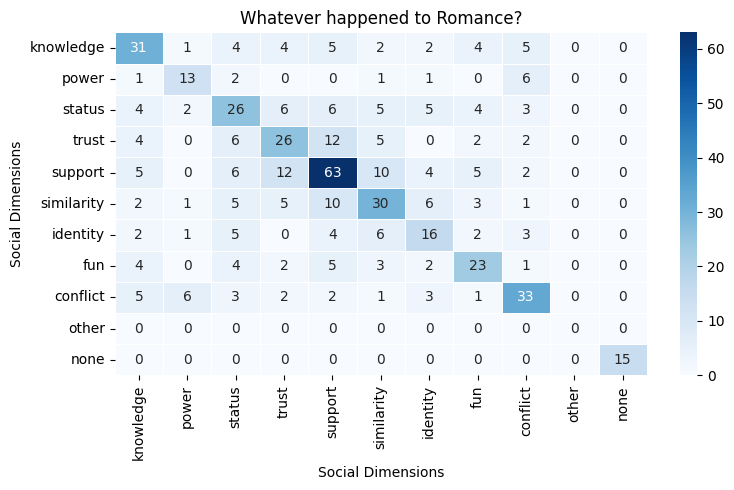

In [193]:
# Where did romance go

romance = original[original['romance']>0]
not_romance = anns[anns['example_id'].isin(romance['example_id'])]
not_romance[dimensions] = not_romance[dimensions].astype(int)

not_romance = not_romance[dimensions].copy()
co_occurrence_matrix = not_romance.T.dot(not_romance)
not_romance['num_true_labels'] = not_romance[dimensions].sum(axis=1)

multi_label_count = (not_romance['num_true_labels'] > 1).sum()

print(f"Number of examples with more than one label: {multi_label_count}")
plt.figure(figsize=(8, 5)) 
sns.heatmap(co_occurrence_matrix, annot=True, cmap='Blues', fmt="d", linewidths=0.5)

plt.title('Whatever happened to Romance?')
plt.xlabel('Social Dimensions')
plt.ylabel('Social Dimensions')
plt.tight_layout()
plt.show()


In [ ]:
romance['conflict'].value_counts()

conflict
0    347
1     75
2     25
3      1
4      1
5      1
Name: count, dtype: int64

In [201]:
old = ['support', 'conflict', 'trust',
       'fun', 'similarity', 'identity', 'status', 'knowledge',
       'power', 'other']
len(romance[romance[old].eq(0).all(1)])

12

In [198]:
romance.columns

Index(['example_id', 'round', 'text', 'h_text', 'support', 'conflict', 'trust',
       'fun', 'similarity', 'identity', 'status', 'romance', 'knowledge',
       'power', 'other', 'contains'],
      dtype='object')